Import the neccessary libraries

In [368]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

Load the dataset

In [369]:
df = pd.read_csv("google.csv")

Display first 5 rows and the dataset information

In [370]:
print(df.head())
print(df.info())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB
None


Rename the columns for clarity and consistency

In [371]:
df.rename(columns={
    "Date":"date",
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Adj Close":"adj_close",
    "Volume":"volume"
},inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4858 non-null   object 
 1   open       4858 non-null   float64
 2   high       4858 non-null   float64
 3   low        4858 non-null   float64
 4   close      4858 non-null   float64
 5   adj_close  4858 non-null   float64
 6   volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB
None


Convert the date column to datetime objects

In [372]:
df["date"] = pd.to_datetime(df["date"])

Create a new feature "day" representing the number of days since the first day in the dataset

In [373]:
df["day"] = (df["date"] - df["date"].min()).dt.days

Drop the original date column as we won't need need it anymore

In [374]:
df = df.drop("date",axis=1)
print(df.head().to_string())

       open      high       low     close  adj_close     volume  day
0  2.490664  2.591785  2.390042  2.499133   2.499133  897427216    0
1  2.515820  2.716817  2.503118  2.697639   2.697639  458857488    1
2  2.758411  2.826406  2.716070  2.724787   2.724787  366857939    4
3  2.770615  2.779581  2.579581  2.611960   2.611960  306396159    5
4  2.614201  2.689918  2.587302  2.640104   2.640104  184645512    6


Define Features (X) and target (y)

In [375]:
# Our feature (X) is the "day", which will use to predict the "close" price (y)
# We need to reshape X to a 2D array because sckit-learn models expect it that way
X = df[["day"]]
y = df[["close"]]

Split the data into training and testing sets

In [376]:
# We use 80% of the data for training the model and 20% for testing its performance
# random_state ensures that the split is the same every time the script is run
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Shape of the training data:",X_train.shape)
print("Shape of testing data:",X_test.shape)

Shape of the training data: (3886, 1)
Shape of testing data: (972, 1)


Choose and train the model

In [377]:
# We'll use a simple Linear Regression model, which is great for beginners
model = LinearRegression()

Train the model using the training data

In [378]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Make predictions on the test set

In [379]:
y_pred = model.predict(X_test)

Evaluate the model's performance

In [380]:
# We'll use two common metrics: Mean Squared Error and R-squared
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Model Evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Model's slope (coefficent): {model.coef_[0]}")
print(f"Model's y-intercept: {model.intercept_}")

Mean Squared Error (MSE): 338.9156996038889
R-squared (R2) Score: 0.783661339517608
Model's slope (coefficent): [0.01672802]
Model's y-intercept: [-17.71474284]


Use the trained model to make a new prediction

In [381]:
# Let's predict the closing price for a hypothetical future date, for example from the start
days_in_20_years = 20 * 365  # Use 365 for calendar days, or 252 for trading days
future_date_prediction = model.predict([[days_in_20_years]])
print(f"\nPredicted closing price after {days_in_20_years} days: ${future_date_prediction[0][0]:.2f}")


Predicted closing price after 7300 days: $104.40


c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


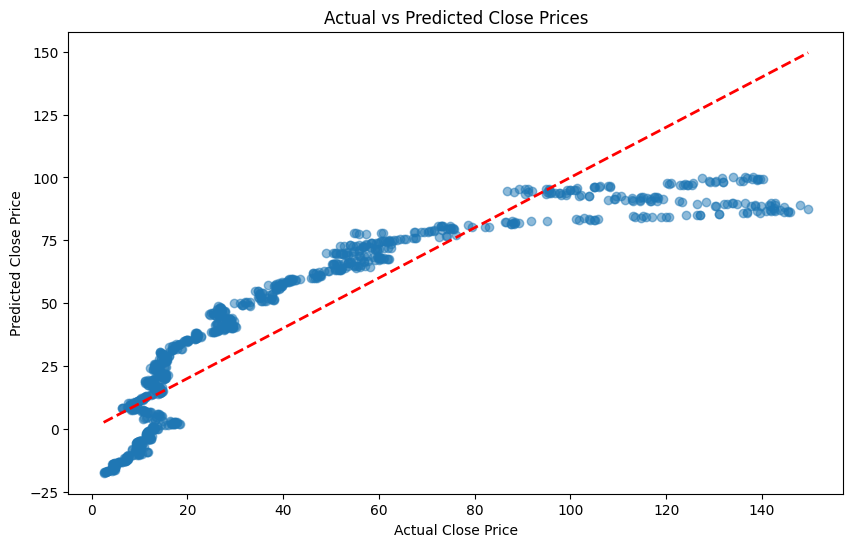


Model Performance Summary:
- The model explains 78.4% of the variance in stock prices
- Average prediction error: $18.41
- The stock price increases by approximately $0.0167 per day on average


In [382]:
# Let's also create a simple visualization to see how well our model fits the data
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.show()

# Print some additional insights
print(f"\nModel Performance Summary:")
print(f"- The model explains {r2*100:.1f}% of the variance in stock prices")
print(f"- Average prediction error: ${np.sqrt(mse):.2f}")
print(f"- The stock price increases by approximately ${model.coef_[0][0]:.4f} per day on average")
